In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, ElasticNetCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics


%matplotlib inline

# Import Trainining dataset

In [4]:
train = pd.read_csv('datasets/clean_train_encoded_poly.csv',keep_default_na=False)

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

In [6]:
train.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area  Lot Shape  Utilities  \
0  109  533352170           60           0.0     13517          2          3   
1  544  531379050           60          43.0     11492          2          3   
2  153  535304180           20          68.0      7922          3          3   
3  318  916386060           60          73.0      9802          3          3   
4  255  906425045           50          82.0     14235          2          3   

   Land Slope  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0           2             6             8        1976            2005   
1           2             7             5        1996            1997   
2           2             5             7        1953            2007   
3           2             5             5        2006            2007   
4           2             6             8        1900            1993   

   Mas Vnr Area  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
0         289.0           3          3          3              0   
1         132.0           3          4          3              0   
2           0.0           4          3          3              0   
3           0.0           3          4          3              0   
4           0.0           3          2          4              0   

   BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0               6         533.0               1           0.0        192.0   
1               6         637.0               1           0.0        276.0   
2               6         731.0               1           0.0        326.0   
3               1           0.0               1           0.0        384.0   
4               1           0.0               1           0.0        676.0   

   Total Bsmt SF  Heating QC  Electrical  2nd Flr SF  Low Qual Fin SF  \
0          725.0           5           4         754                0   
1          913.0           5           4        1209                0   
2         1057.0           3           4           0                0   
3          384.0           4           4         700                0   
4          676.0           3           4         614                0   

   Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional  \
0              3              1             4              6           7   
1              4              1             4              8           7   
2              3              1             4              5           7   
3              3              1             3              7           7   
4              3              1             3              6           7   

   Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Finish  Garage Cars  \
0           0             0         1976.0              2          2.0   
1           1             3         1997.0              2          2.0   
2           0             0         1953.0              1          1.0   
3           0             0         2007.0              3          2.0   
4           0             0         1957.0              1          2.0   

   Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
0        475.0            3            3            2             0   
1        559.0            3            3            2             0   
2        246.0            3            3            2             0   
3        400.0            3            3            2           100   
4        484.0            3            3            0             0   

   Op

In [7]:
train.corr()

Id       PID  MS SubClass  Lot Frontage  \
Id                              1.000000  0.175813     0.016220     -0.008959   
PID                             0.175813  1.000000    -0.036497     -0.044146   
MS SubClass                     0.016220 -0.036497     1.000000     -0.229226   
Lot Frontage                   -0.008959 -0.044146    -0.229226      1.000000   
Lot Area                        0.037723  0.031333    -0.251220      0.099862   
Lot Shape                      -0.013110  0.081356     0.055447      0.203387   
Utilities                       0.018598 -0.033721     0.024032      0.019795   
Land Slope                     -0.000367  0.136458    -0.001304      0.022817   
Overall Qual                   -0.061400 -0.255422     0.070134      0.107074   
Overall Cond                   -0.027868  0.118917    -0.107163     -0.021122   
Year Built                     -0.068426 -0.330231     0.083896      0.014520   
Year Remod/Add                 -0.090772 -0.166833     0.063987      0.053117   
Mas Vnr Area                   -0.038419 -0.244819     0.012133      0.085973   
Exter Cond                     -0.011576  0.053215    -0.053205     -0.039192   
Bsmt Qual                      -0.047878 -0.189316     0.084639      0.038887   
Bsmt Cond                       0.013725 -0.098363     0.002090     -0.003056   
Bsmt Exposure                   0.050534  0.006240     0.042910      0.110054   
BsmtFin Type 1                 -0.071846 -0.104659     0.074978     -0.049635   
BsmtFin SF 1                   -0.050491 -0.091119    -0.057761      0.012015   
BsmtFin Type 2                 -0.012859 -0.016096    -0.035823     -0.000378   
BsmtFin SF 2                   -0.000141 -0.007975    -0.070221      0.000751   
Bsmt Unf SF                     0.014003 -0.111522    -0.140131      0.141774   
Total Bsmt SF                  -0.037946 -0.215008    -0.235050      0.161489   
Heating QC                     -0.026213 -0.089576    -0.004008      0.066265   
Electrical                     -0.050097 -0.136192     0.038470     -0.005325   
2nd Flr SF                     -0.004068 -0.008875     0.303045     -0.021791   
Low Qual Fin SF                -0.007694  0.050406     0.010832     -0.010266   
Gr Liv Area                    -0.018862 -0.118857     0.070578      0.132855   
Bsmt Full Bath                 -0.027896 -0.031265     0.025306      0.000530   
Bsmt Half Bath                  0.003773 -0.006432    -0.011634     -0.017108   
Full Bath                      -0.057752 -0.188494     0.134057      0.042665   
Half Bath                      -0.036390 -0.153863     0.205416     -0.036143   
Bedroom AbvGr                   0.009958  0.005748    -0.048728      0.093598   
Kitchen AbvGr                   0.009149  0.045720     0.193634     -0.001186   
Kitchen Qual                   -0.071681 -0.179992     0.019753      0.099324   
TotRms AbvGrd                  -0.004619 -0.096069     0.004491      0.166190   
Functional                     -0.030543 -0.101859    -0.004985     -0.000984   
Fireplaces                     -0.034936 -0.105992    -0.027030      0.024426   
Fireplace Qu                   -0.021812 -0.150746    -0.028349      0.077041   
Garage Yr Blt                  -0.057097 -0.263510     0.091920      0.019667   
Garage Finish                  -0.057968 -0.247108     0.025672      0.071740   
Garage Cars                    -0.036130 -0.188312     0.021679      0.144060   
Garage Area                    -0.032923 -0.160072    -0.057753      0.189316   
Garage Qual                    -0.038376 -0.132591     0.035384     -0.002794   
Garage Cond                    -0.035898 -0.123338    -0.017506     -0.010330   
Paved Drive                    -0.045995 -0.204313     0.044006     -0.037483   
Wood Deck SF                    0.001609 -0.027929     0.009695      0.005110   
Open Porch SF                   0.006147 -0.088332    -0.013291      0.083676   
Enclosed Porch                  0.031432  0.136956    -0.061474      

In [8]:
train.corr().shape

(216, 216)

In [14]:
# Finding top correlations with Sale Price

In [9]:
corr_sp = train[train.columns[1:-1]].apply(lambda x: x.corr(train['SalePrice']))
corr_sp.abs().sort_values(ascending=False)
# len(c)

New_Bsmt_Feat New_Ovr_Kit_Feat    0.902488
New_Ovr_Kit_Feat Exter Qual       0.890821
New_Gar_Feat New_Ovr_Kit_Feat     0.848087
New_Ovr_Kit_Feat 1st Flr SF       0.832614
New_Ovr_Kit_Feat                  0.829210
New_Bsmt_Feat Exter Qual          0.824928
New_Gar_Feat New_Bsmt_Feat        0.815495
Overall Qual                      0.799589
Exter Qual 1st Flr SF             0.797014
New_Ovr_Kit_Feat^2                0.795647
New_Gar_Feat Exter Qual           0.781692
New_Bsmt_Feat^2                   0.766448
New_Gar_Feat 1st Flr SF           0.764487
New_Bsmt_Feat                     0.756997
New_Bsmt_Feat 1st Flr SF          0.752954
Gr Liv Area                       0.725804
Exter Qual^2                      0.721485
Exter Qual                        0.712082
Kitchen Qual                      0.691005
Total Bsmt SF                     0.661263
New_Gar_Feat                      0.656438
Garage Area                       0.650425
Garage Cars                       0.648155
1st Flr SF 

In [10]:
# Keeping only the ones that have corr > 0.2

In [11]:
corr_sp = corr_sp[corr_sp.abs()>0.2]
corr_sp.sort_values(ascending=False)

New_Bsmt_Feat New_Ovr_Kit_Feat    0.902488
New_Ovr_Kit_Feat Exter Qual       0.890821
New_Gar_Feat New_Ovr_Kit_Feat     0.848087
New_Ovr_Kit_Feat 1st Flr SF       0.832614
New_Ovr_Kit_Feat                  0.829210
New_Bsmt_Feat Exter Qual          0.824928
New_Gar_Feat New_Bsmt_Feat        0.815495
Overall Qual                      0.799589
Exter Qual 1st Flr SF             0.797014
New_Ovr_Kit_Feat^2                0.795647
New_Gar_Feat Exter Qual           0.781692
New_Bsmt_Feat^2                   0.766448
New_Gar_Feat 1st Flr SF           0.764487
New_Bsmt_Feat                     0.756997
New_Bsmt_Feat 1st Flr SF          0.752954
Gr Liv Area                       0.725804
Exter Qual^2                      0.721485
Exter Qual                        0.712082
Kitchen Qual                      0.691005
Total Bsmt SF                     0.661263
New_Gar_Feat                      0.656438
Garage Area                       0.650425
Garage Cars                       0.648155
1st Flr SF 

In [12]:
corr_sp.index

Index(['PID', 'Lot Area', 'Lot Shape', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', 'Electrical', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'zoning_RL',
       'zoning_RM', 'land_countour_HLS', 'neigh_NAmes', 'neigh_NoRidge',
       'neigh_NridgHt', 'neigh_OldTown', 'neigh_StoneBr', 'hse_style_2Story',
       'rf_style_Gable', 'rf_style_Hip', 'ext1st_VinylSd', 'ext2nd_VinylSd',
       'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone',
       'found_CBlock', 'found_PConc', 'ctrl_air_Y', 'gar_type_Attchd',
       'gar_type_BuiltIn', 'gar_type_Detchd', 'sale_type_New', 'sale_type_WD 

In [13]:
interested_feat = corr_sp.index.tolist()

In [14]:
interested_feat

['PID',
 'Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'zoning_RL',
 'zoning_RM',
 'land_countour_HLS',
 'neigh_NAmes',
 'neigh_NoRidge',
 'neigh_NridgHt',
 'neigh_OldTown',
 'neigh_StoneBr',
 'hse_style_2Story',
 'rf_style_Gable',
 'rf_style_Hip',
 'ext1st_VinylSd',
 'ext2nd_VinylSd',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone',
 'found_CBlock',
 'found_PConc',
 'ctrl_air_Y',
 'gar_type_Attchd',
 'gar_type_BuiltIn',
 'gar_type_Detchd',
 'sale_type_New',
 'sale_type_WD ',
 'New_Gar_Feat',
 'New_Bsmt_Feat',
 'Ne

In [17]:
# adding sale price. removing ID and PID. 
interested_feat.append('SalePrice')
# interested_feat.remove('Id')
interested_feat.remove('PID')

In [18]:
train[interested_feat]

Lot Area  Lot Shape  Overall Qual  Year Built  Year Remod/Add  \
0        13517          2             6        1976            2005   
1        11492          2             7        1996            1997   
2         7922          3             5        1953            2007   
3         9802          3             5        2006            2007   
4        14235          2             6        1900            1993   
...        ...        ...           ...         ...             ...   
1926     11449          2             8        2007            2007   
1927     12342          2             4        1940            1950   
1928      7558          3             6        1928            1950   
1929     10400          3             4        1956            1956   
1930      7500          3             7        1999            1999   

      Mas Vnr Area  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
0            289.0          3          3              0               6   
1            132.0          4          3              0               6   
2              0.0          3          3              0               6   
3              0.0          4          3              0               1   
4              0.0          2          4              0               1   
...            ...        ...        ...            ...             ...   
1926           0.0          4          3              2               6   
1927           0.0          3          3              0               4   
1928           0.0          3          3              0               1   
1929           0.0          3          3              0               3   
1930           0.0          3          3              0               1   

      BsmtFin SF 1  Total Bsmt SF  Heating QC  Electrical  2nd Flr SF  \
0            533.0          725.0           5           4         754   
1            637.0          913.0           5           4        1209   
2            731.0         1057.0           3           4           0   
3              0.0          384.0           4           4         700   
4              0.0          676.0           3           4         614   
...            ...            ...         ...         ...         ...   
1926        1011.0         1884.0           5           4           0   
1927         262.0          861.0           5           4           0   
1928           0.0          896.0           4           4         741   
1929         155.0         1200.0           3           4           0   
1930           0.0          994.0           4           4         776   

      Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Kitchen Qual  \
0            1479             0.0          2          1             4   
1            2122             1.0          2          1             4   
2            1057             1.0          1          0             4   
3            1444             0.0          2          1             3   
4            1445             0.0          2          0             3   
...           ...             ...        ...        ...           ...   
1926         1728             1.0          2          0             4   
1927          861             0.0          1          0             3   
1928         1913             0.0          1          1             3   
1929         1200             1.0          1          0             3   
1930         1804             0.0          2          1             4   

      TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Finish  \
0                 6           0             0         1976.0              2   
1                 8           1             3         1997.0              2   
2                 5           0             0         1953.0              1   
3                 7           0             0         2007.0              3   
4                 6           0             0         1957.0              1   
...             ...     

In [36]:
# ---------------------------------------------------------------------------------------------------

## Checking correlation amongst features

_Below cell will generate Heatmap just for the interested features (ones having at least some correlation with SalesPrice)_
<br>
<br>
_Commented out for now as it takes a while to run due to large number of cols._
<br>_Uncommeted only mask variable as it is used later_

In [20]:
#Heatmap
# fig = plt.figure(figsize=(80,80))
mask = np.triu(np.ones_like(train[interested_feat].corr()))

# ax = sns.heatmap(train[interested_feat].corr(), 
#                  annot=True, 
#                  annot_kws={'size':20}, 
#                  mask=mask,
#                  cmap='coolwarm')

# ax.set_title('Correlations between features', fontsize=30)
# ax.tick_params(axis='x', labelsize=15, labelrotation=90)
# ax.tick_params(axis='y', labelsize=15, labelrotation=0)

_It is **nearly** impossibe to read.
<br>
Better than the one before!_

In [22]:
corrtot_matrix = train[interested_feat].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corrstot = (corrtot_matrix.where(mask.astype(np.bool)).stack().sort_values(ascending=False))

corrstot[(corrstot!=1) & (corrstot>0.9)]

Exter Qual                      Exter Qual^2                      0.995866
Garage Area                     New_Gar_Feat                      0.987243
ext1st_VinylSd                  ext2nd_VinylSd                    0.978617
New_Bsmt_Feat^2                 New_Bsmt_Feat 1st Flr SF          0.977154
1st Flr SF                      1st Flr SF^2                      0.970620
Total Bsmt SF                   New_Bsmt_Feat                     0.966445
New_Ovr_Kit_Feat                New_Ovr_Kit_Feat^2                0.962518
New_Gar_Feat                    New_Gar_Feat^2                    0.961014
New_Bsmt_Feat                   New_Bsmt_Feat Exter Qual          0.958781
rf_style_Gable                  rf_style_Hip                      0.953534
New_Bsmt_Feat                   New_Bsmt_Feat 1st Flr SF          0.952685
Gr Liv Area                     New_Ovr_Kit_Feat                  0.949968
New_Bsmt_Feat^2                 New_Bsmt_Feat Exter Qual          0.949482
New_Bsmt_Feat            

## Removing the highly correlated ones

In [23]:
# Removing ext2nd_VinylSd

In [24]:
interested_feat.remove('ext2nd_VinylSd')

In [25]:
# Removing rf_style_Hip

In [26]:
interested_feat.remove('rf_style_Hip')

In [27]:
# Removing Fireplaces

In [28]:
# interested_feat.remove('Fireplaces')

In [29]:
# Removing Garage Cars 

In [30]:
# interested_feat.remove('Garage Cars')

In [101]:
interested_feat.remove('SalePrice')

In [103]:
interested_feat.remove('SalePrice')

In [104]:
interested_feat

['Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'zoning_RL',
 'zoning_RM',
 'land_countour_HLS',
 'neigh_NAmes',
 'neigh_NoRidge',
 'neigh_NridgHt',
 'neigh_OldTown',
 'neigh_StoneBr',
 'hse_style_2Story',
 'rf_style_Gable',
 'ext1st_VinylSd',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone',
 'found_CBlock',
 'found_PConc',
 'ctrl_air_Y',
 'gar_type_Attchd',
 'gar_type_BuiltIn',
 'gar_type_Detchd',
 'sale_type_New',
 'sale_type_WD ',
 'New_Gar_Feat',
 'New_Bsmt_Feat',
 'New_Ovr_Kit_Feat',
 'Exter Qual',
 '1st Flr SF

In [105]:
#total interested features in feeding into our model later on
len(interested_feat)

73

# Modelling

In [106]:
interested_feat

['Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'zoning_RL',
 'zoning_RM',
 'land_countour_HLS',
 'neigh_NAmes',
 'neigh_NoRidge',
 'neigh_NridgHt',
 'neigh_OldTown',
 'neigh_StoneBr',
 'hse_style_2Story',
 'rf_style_Gable',
 'ext1st_VinylSd',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_None',
 'mas_vnr_type_Stone',
 'found_CBlock',
 'found_PConc',
 'ctrl_air_Y',
 'gar_type_Attchd',
 'gar_type_BuiltIn',
 'gar_type_Detchd',
 'sale_type_New',
 'sale_type_WD ',
 'New_Gar_Feat',
 'New_Bsmt_Feat',
 'New_Ovr_Kit_Feat',
 'Exter Qual',
 '1st Flr SF

In [107]:
X = train[interested_feat]
y = train['SalePrice']

In [108]:
len(interested_feat)

73

In [109]:
print(X.shape)
print(y.shape)

(1931, 73)
(1931,)


## Train/Test Split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
X_train.shape

(1448, 73)

In [112]:
X_test.shape

(483, 73)

## Scaling 

In [113]:
ss = StandardScaler()

In [114]:
# Fit (get mu and sigma)using the Train data
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
# Transform X_train and X_test using mu and sigma from X_train
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Instantiate Models: Linear Regression, Lasso, Ridge, Elastic Net

In [116]:
lr = LinearRegression()

In [117]:
#Trying two different lasso models
lasso = LassoCV(n_alphas=500)

l_alpha_list = np.arange(0.001,0.15,0.0025)
lasso_model = LassoCV(alphas=l_alpha_list, cv=5)

In [118]:
#Trying two different ridge models
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

alpha_list = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas=alpha_list, store_cv_values=True)

## Checking Scores

### Linear Regression

In [119]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Linear Regression crossval R2 Score on Training set:', lr_scores.mean())

Linear Regression crossval R2 Score on Training set: 0.915566440547666


In [120]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
print('Linear Regression R2 Score on Train Set:', lr.score(X_train, y_train))

Linear Regression R2 Score on Train Set: 0.9313684897653886


In [122]:
print('Linear Regression R2 Score on Test Set:', lr.score(X_test, y_test))

Linear Regression R2 Score on Test Set: 0.9227344766587158


In [232]:
lr_test_score = lr.score(X_test,y_test)

### Lasso Regression

#### Trying Lasso model#1

In [166]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print('Lasso Regression crossval R2 Score on Training set: (with Lasso(n_alphas=500))', lasso_scores.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021847124.3433838, tolerance: 817871768.7419417
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4921612699.430176, tolerance: 802428087.5255752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1616290343.737671, tolerance: 789755233.8046356
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2013293881.

Lasso Regression crossval R2 Score on Training set: (with Lasso(n_alphas=500)) 0.9161622658924277


In [167]:
lasso.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2265034284.3170166, tolerance: 888428313.5201502
  positive)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [168]:
print('Lasso Regression R2 Score on train Set:', lasso.score(X_train, y_train))

Lasso Regression R2 Score on train Set: 0.9295758227283342


In [169]:
print('Lasso Regression R2 Score on test Set:', lasso.score(X_test, y_test))

Lasso Regression R2 Score on test Set: 0.9324047334385098


#### Trying Lasso model#2

In [127]:
lasso_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251230201371.49194, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245032355827.76575, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234849164489.56107, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to inc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10041237127.220215, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13120409857.281372, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17868306462.58789, tolerance: 707009094.7519406
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3299169210.4544067, tolerance: 746983513.3761115
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3876991342.064636, tolerance: 746983513.3761115
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4621183857.079529, tolerance: 746983513.3761115
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incre

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174108734160.05966, tolerance: 703984642.438565
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148693999875.36765, tolerance: 703984642.438565
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135624093470.15039, tolerance: 703984642.438565
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increa

LassoCV(alphas=array([0.001 , 0.0035, 0.006 , 0.0085, 0.011 , 0.0135, 0.016 , 0.0185,
       0.021 , 0.0235, 0.026 , 0.0285, 0.031 , 0.0335, 0.036 , 0.0385,
       0.041 , 0.0435, 0.046 , 0.0485, 0.051 , 0.0535, 0.056 , 0.0585,
       0.061 , 0.0635, 0.066 , 0.0685, 0.071 , 0.0735, 0.076 , 0.0785,
       0.081 , 0.0835, 0.086 , 0.0885, 0.091 , 0.0935, 0.096 , 0.0985,
       0.101 , 0.1035, 0.106 , 0.1085, 0.111 , 0.1135, 0.116 , 0.1185,
       0.121 , 0.1235, 0.126 , 0.1285, 0.131 , 0.1335, 0.136 , 0.1385,
       0.141 , 0.1435, 0.146 , 0.1485]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [128]:
lasso_model.alpha_

0.146

In [129]:
lasso_model_opt = Lasso(alpha=lasso_model.alpha_)

In [130]:
print('Lasso Regression model2 crossval R2 Score on Training set: (with list of alphas))', cross_val_score(lasso_model_opt,X_train,y_train,cv=5).mean())


Lasso Regression model2 crossval R2 Score on Training set: (with list of alphas)) 0.9123228580458376


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251284749542.8121, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244014688440.9405, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224533283352.03827, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21847649887

In [134]:
lasso_model_opt.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297928093825.6302, tolerance: 888428313.5201502
  positive)


Lasso(alpha=0.146, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
print('Lasso model2 Regression R2 Score on train Set:', lasso_model_opt.score(X_train, y_train))

Lasso model2 Regression R2 Score on train Set: 0.9313438265114931


In [136]:
print('Lasso model2 Regression R2 Score on test Set:', lasso_model_opt.score(X_test, y_test))

Lasso model2 Regression R2 Score on test Set: 0.9221915189058257


### Ridge

#### Trying Ridge model #1

In [137]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print('Ridge Regression R2 Train Score: (with RidgeCV(alphas=np.linspace(.1, 10, 100)))',ridge_scores.mean())

Ridge Regression R2 Train Score: (with RidgeCV(alphas=np.linspace(.1, 10, 100))) 0.9177375127109866


In [138]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [139]:
print('Ridge Regression model #1 R2 Score on train Set:', ridge.score(X_train, y_train))

Ridge Regression model #1 R2 Score on train Set: 0.9298833943410207


In [140]:
print('Ridge Regression model #1 R2 Score on test Set:', ridge.score(X_test, y_test))

Ridge Regression model #1 R2 Score on test Set: 0.935707283674698


In [141]:
ridge.alpha_

10.0

#### Trying model #2

In [142]:
ridge_model = ridge_model.fit(X_train,y_train)

In [143]:
ridge_model.alpha_

14.314589375234792

In [144]:
ridge_opt_model = Ridge(alpha=ridge_model.alpha_)

In [145]:
print('Ridge Regression model #2 R2 Train Score: (with RidgeCV(alphas=np.linspace(.1, 10, 100)))',cross_val_score(ridge_opt_model,X_train,y_train,cv=5).mean())

Ridge Regression model #2 R2 Train Score: (with RidgeCV(alphas=np.linspace(.1, 10, 100))) 0.9153508131901422


In [146]:
ridge_opt_model.fit(X_train,y_train)

Ridge(alpha=14.314589375234792, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
print('Ridge model2 Regression R2 Score on train Set:', ridge_opt_model.score(X_train, y_train))

Ridge model2 Regression R2 Score on train Set: 0.9294663829630875


In [148]:
print('Ridge model2 Regression R2 Score on test Set:', ridge_opt_model.score(X_test, y_test))

Ridge model2 Regression R2 Score on test Set: 0.9360980042170366


## Grid Search for finding best parameters

In [149]:
lasso_params = {'alpha': np.arange(0.001,0.5,0.0025)}

In [150]:
ridge_params = {'alpha': np.logspace(0,5,500)}

#### Grid Search for Lasso

In [151]:
# Instantiate our GridSearchCV object.
lasso_gridsearch = GridSearchCV(Lasso(), # What is the model we want to fit?
                              lasso_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [152]:
# Fit the GridSearchCV object to the data
lasso_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254454977959.56012, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246423717933.30594, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230336960953.83087, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234806002424.64368, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254071693382.02576, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246132652162.09207, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229637370

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234240758575.0496, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253688591449.64578, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245841674063.6628, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22893753119

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228337483140.55185, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221529191383.24353, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233677036850.95505, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2533056751

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233195055460.1726, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252977605733.08563, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245301518286.13153, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2276371971

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252595028516.2511, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245010790484.4845, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226936677205.6847, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220409325582

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244720150537.5685, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226235948989.34576, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219847280804.76627, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23199494725

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225535040501.58478, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219283870315.83252, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231437259439.41125, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2517758417

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218719013527.5211, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230881075212.40347, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251393858057.39883, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24409765763

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224132487904.26935, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218152740715.91782, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230326372395.78476, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2510120464

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217585129730.85742, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229773193191.02, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250630420450.4774, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243517025137.1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229221475124.38235, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250248979573.94495, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243226841905.35275, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222629034

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216445657699.7084, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228671238109.49716, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249867720103.409, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242936747496.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215873736478.96127, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228122470195.89044, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249486682372.5253, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24264674205

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227575175769.5154, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249105802333.05573, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242356826216.6029, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22052279431

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242067025789.95895, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219820439171.9189, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214643550062.49133, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22695149705

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241777291360.4899, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219117768531.9384, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214067359913.8875, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226407367843.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247964292527.2011, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241487646526.37292, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218415286327.0019, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21348954124

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212993120826.82205, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225400538492.4596, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247584228570.15298, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24119809142

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240908676131.93317, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217009501662.75977, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212329896069.88608, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2247834973

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246824577938.84152, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240619305889.7438, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216306309171.71558, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2117477773

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211248100861.83295, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223784819828.65884, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246445018922.63016, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2403300295

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240082147536.36887, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215000580639.5666, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210663329621.31116, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22324912019

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222791189344.5421, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245740716449.80984, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239793033549.15967, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142972647

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222258179808.12662, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245361703398.58008, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239504008695.417, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21359361165

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239256345881.28885, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212991057941.83514, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208985075706.3646, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22172661542

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212287309957.15887, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208395290569.71893, tolerance: 703984642.438565
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221196422982.2402, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24460424289

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220667498234.15387, tolerance: 683307300.4683752
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244225796189.7073, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238637485719.31802, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2114827490

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243847675082.1941, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238348866226.47034, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210779374734.4421, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20712615689

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001 , 0.0035, 0.006 , 0.0085, 0.011 , 0.0135, 0.016 , 0.0185,
       0.021 , 0.0235, 0.026 , 0.02...
       0.381 , 0.3835, 0.386 , 0.3885, 0.391 , 0.3935, 0.396 , 0.3985,
       0.401 , 0.4035, 0.406 , 0.4085, 0.411 , 0.4135, 0.416 , 0.4185,
       0.421 , 0.4235, 0.426 , 0.4285, 0.431 , 0.4335, 0.436 , 0.4385,
       0.441 , 0.4435, 0.446 , 0.4485, 0.451 , 0.4535, 0.456 , 0.4585,
       0.461 , 0.4635, 0.466 , 0.4685, 0.471 , 0.4735, 0.476 , 0.4785,
       0.481 , 0.4835, 0.486 , 0.4885, 0.491 , 0.4935, 0.496 , 0.4985])},
             pre_dispatch='2*n_jobs', refit=True, r

In [153]:
# Print out the best score found in the search.
lasso_gridsearch.best_score_

0.9123706808289572

In [154]:
# Print out the set of hyperparameters that achieved the best score.
lasso_gridsearch.best_params_

{'alpha': 0.4985}

#### GridSearch for Ridge

In [155]:
# Instantiate our GridSearchCV object.
ridge_gridsearch = GridSearchCV(Ridge(), # What is the model we want to fit?
                              ridge_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [156]:
# Fit the GridSearchCV object to the data
ridge_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e+00, 1.02334021e+00, 1.04722519e+00, 1.07166765e+00,
       1.09668060e+00, 1.12227736e+00, 1.14847155e+00, 1.17527712e+00,
       1.20270833...
       6.45088409e+04, 6.60144909e+04, 6.75552832e+04, 6.91320378e+04,
       7.07455942e+04, 7.23968114e+04, 7.40865683e+04, 7.58157646e+04,
       7.75853206e+04, 7.93961785e+04, 8.12493021e+04, 8.31456781e+04,
       8.50863158e+04, 8.70722485e+04, 8.91045332e+04, 9.11842520e+04,
       9.33125118e+04, 9.54904456e+04, 9.77192128e+04, 1.00000000e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [157]:
# Print out the best score found in the search.
ridge_gridsearch.best_score_

0.915352477751129

In [158]:
# Print out the set of hyperparameters that achieved the best score.
ridge_gridsearch.best_params_

{'alpha': 13.250872919979532}

### Checking train and test score the the best GridSearch Params

####  -------Best Lasso with gridsearch--------

In [161]:
best_lasso = Lasso(alpha=lasso_gridsearch.best_params_['alpha'])

In [162]:
print('Best Lasso Regression crossval R2 Score on Training set: (with list of alphas))', cross_val_score(best_lasso,X_train,y_train,cv=5).mean())


Best Lasso Regression crossval R2 Score on Training set: (with list of alphas)) 0.9123706808289572


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243631618759.32062, tolerance: 707009094.7519406
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238183961499.96167, tolerance: 746983513.3761115
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210377281457.1678, tolerance: 712023268.7195548
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2067864136

In [163]:
best_lasso.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281118699212.72925, tolerance: 888428313.5201502
  positive)


Lasso(alpha=0.4985, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
print('Best Lasso R2 Score on train Set:', best_lasso.score(X_train, y_train))

Best Lasso R2 Score on train Set: 0.9313442094163696


In [165]:
print('Best Lasso R2 Score on test Set:', best_lasso.score(X_test, y_test))

Best Lasso R2 Score on test Set: 0.922375005604034


_Lasso Model #1 had the best performance @ 0.932._

In [171]:
best_lasso = lasso

####  -------Best Ridge--------

In [172]:
best_ridge = Ridge(alpha=ridge_gridsearch.best_params_['alpha'])

In [173]:
print('Best Ridge Regression crossval R2 Score on Training set:)', cross_val_score(best_ridge,X_train,y_train,cv=5).mean())


Best Ridge Regression crossval R2 Score on Training set:) 0.915352477751129


In [174]:
best_ridge.fit(X_train,y_train)

Ridge(alpha=13.250872919979532, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [175]:
print('Best Ridge R2 Score on train Set:', best_ridge.score(X_train, y_train))

Best Ridge R2 Score on train Set: 0.9295621623793463


In [176]:
print('Best Ridge R2 Score on test Set:', best_ridge.score(X_test, y_test))

Best Ridge R2 Score on test Set: 0.9360356638579617


_This seems to be almost same (lower on the 4th significant digit) as compared to the Ridge Model #2.
<br>Ridge Model #2 had an alpha=14.314589375234792_

_saving the best ridge_

In [177]:
best_ridge = ridge_opt_model

## Inferential Visualizations

### Linear Regression

_Calculate Predictions and Residuals_

In [178]:
lr_predictions = lr.predict(X_test)

In [179]:
lr.coef_

array([  4460.27310538,  -1417.58091804,   3091.86417665,   5413.81339422,
          795.93749901,    430.08405139,   2556.46964836,    371.8265863 ,
         4158.67277322,    106.34716922,   7666.55605393,   3708.23900816,
         2579.02390163,   -317.73990973,   3857.72491829, -16494.71766866,
         2057.56653716,   1123.42295158,   1451.30554718,   -931.23748028,
          537.07870462,     67.36035577,   3479.37666121,    350.48635073,
          535.37632705,   1792.29284391, -12413.56223798,   -121.88676899,
         1559.10921514,    611.48389219,    681.5086418 ,  -1671.32151537,
        -3742.688912  ,   1630.37331765,     85.04774795,   1265.06579677,
         1989.74989879,   -485.47817527,   2850.57303554,   -986.46257244,
        -1498.39560971,    233.68049887,   2395.62863528,   3504.31817032,
         3079.035599  ,  -1682.74887777,    672.11447577,   1514.93355329,
         5531.2545732 ,   2765.76335839,   4593.983307  ,   4600.72492274,
          301.31789794,  

In [180]:
lr_residuals = y_test - lr_predictions

In [221]:
#bar graph - show the correlation of the coef to see if it's positive or neg
pd.Series(lr.coef_, index = interested_feat).sort_values(ascending=True).plot.barh(figsize = (12,15),)
plt.xlabel('Features')
plt.rc('xtick', labelsize=10)
plt.ylabel('Corresponding Linear Regression Coefficients')
plt.title('Most Significant Features')
plt.show()

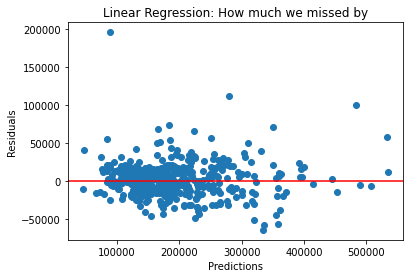

In [222]:
plt.scatter(lr_predictions, lr_residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Linear Regression: How much we missed by')
plt.axhline(0, color='r');
plt.show()

### Lasso Regression

_Calculate predictions and residuals_ 

In [182]:
lasso_predictions = best_lasso.predict(X_test)

In [183]:
best_lasso.coef_

array([  4148.69161758,  -1096.61729109,   5378.15396712,   4536.58123034,
         1340.4928802 ,    739.67060917,      0.        ,   -557.59919554,
         3997.89143785,    215.53571224,   7691.00906105,  -5012.31578879,
         2716.60008216,   -326.44135604,      0.        ,  -5547.94428256,
         1538.04849618,    233.38006601,   1136.56724586,      0.        ,
            0.        ,      0.        ,   3514.85576814,     -0.        ,
          585.1616967 ,   1233.44109479,  -6582.54940907,    238.23448725,
         1383.1434071 ,    626.82637155,    731.24463707,   -309.45992378,
        -2812.46701864,   1868.37370807,      0.        ,   1081.643857  ,
         2083.54666717,   -506.08463099,   2691.88983618,   -816.60257871,
        -1443.17137761,    162.73613175,      0.        ,   1008.1661122 ,
         1691.19888354,  -1146.14988362,   1105.14991151,   1492.45644216,
         3957.71026474,   2079.88184864,   3088.97233632,   4497.1333058 ,
          257.72157514,  

In [184]:
lasso_residuals = y_test - lasso_predictions

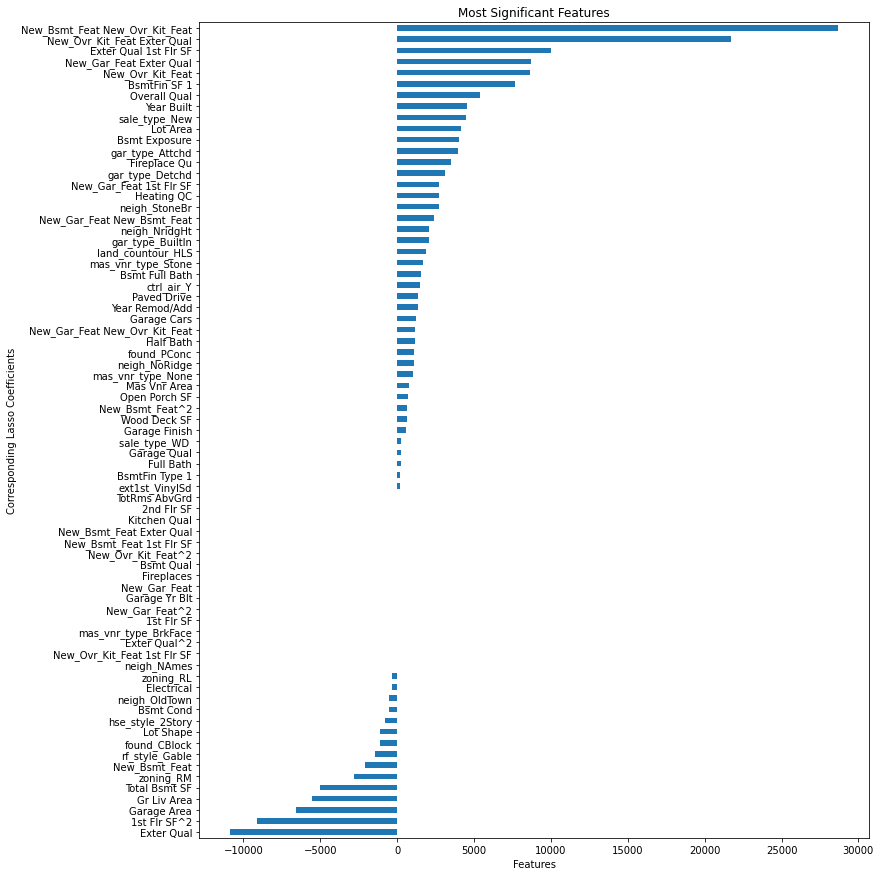

In [225]:
#bar graph - show the correlation of the coef to see if it's positive or neg
pd.Series(best_lasso.coef_, index = interested_feat).sort_values(ascending=True).plot.barh(figsize = (12,15))
plt.xlabel('Features')
plt.ylabel('Corresponding Lasso Coefficients')
plt.title('Most Significant Features')
plt.show()

In [223]:
plt.scatter(lasso_predictions, lasso_residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Lasso Regression: How much we missed by')
plt.axhline(0, color='r');
plt.show()

### Ridge Regression

_Calculate predictions and residuals_ 

In [186]:
ridge_predictions = best_ridge.predict(X_test)

In [187]:
best_ridge.coef_

array([ 4370.70805012, -1086.62168508,  5468.9936219 ,  4430.98415423,
        1368.72843017,   740.52556715,   332.20895501,  -621.89398405,
        4129.13229682,   369.77777438,  7619.00705574, -3927.9194753 ,
        2712.84802992,  -452.20710602,  1202.45796353, -6337.83299594,
        1609.77885945,   501.1742916 ,  1400.0624125 ,   500.72605712,
         506.44496808,   181.63354178,  3475.92309374,  -617.42118901,
         734.75787791,  1392.63756319, -5361.94100442,   410.58654469,
        1533.43143631,   741.28183806,   851.97153137,  -894.86007979,
       -3294.15130986,  1770.72916557,   215.91611436,  1432.25293823,
        2238.93131797,  -637.65858332,  2978.45265816,  -946.83343422,
       -1612.45837646,   321.98399997,  1752.2130881 ,  2878.41990879,
        2755.07449833, -1074.73918144,  1168.98274219,  1598.7351586 ,
        4440.8151571 ,  2596.07900754,  3769.50966415,  4727.59687417,
         427.87865982, -2562.82804382, -5019.72462183, 10278.81449113,
      

In [188]:
ridge_residuals = y_test - ridge_predictions

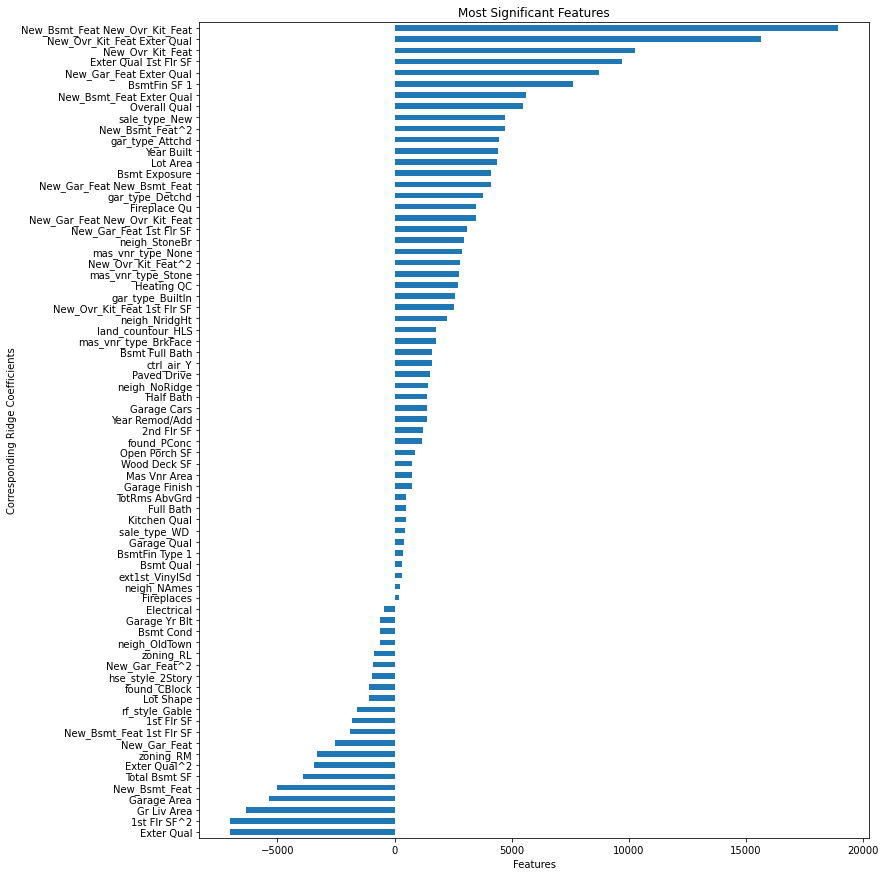

In [227]:
#bar graph - show the correlation of the coef to see if it's positive or neg
pd.Series(best_ridge.coef_, index = interested_feat).sort_values(ascending=True).plot.barh(figsize = (12,15))
plt.xlabel('Features')
plt.ylabel('Corresponding Ridge Coefficients')
plt.title('Most Significant Features')
plt.show()

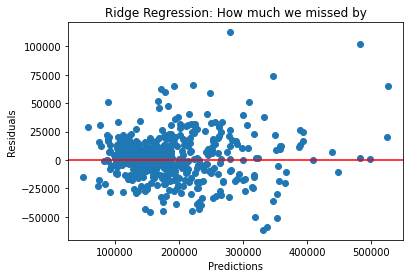

In [226]:
plt.scatter(ridge_predictions, ridge_residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Ridge Regression: How much we missed by')
plt.axhline(0, color='r');
plt.show()

### Plotting more stuff

In [230]:
l_gridsearch_df = pd.DataFrame(ridge_gridsearch.cv_results_)

In [231]:
l_gridsearch_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002055      0.001329         0.000473        0.000042           1   
1       0.001329      0.000101         0.000471        0.000087     1.02334   
2       0.001279      0.000047         0.000430        0.000020     1.04723   
3       0.001348      0.000041         0.000520        0.000180     1.07167   
4       0.001574      0.000486         0.000438        0.000020     1.09668   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 1.0}           0.938387           0.905139   
1   {'alpha': 1.023340212191642}           0.938377           0.905171   
2  {'alpha': 1.0472251898884348}           0.938368           0.905203   
3  {'alpha': 1.0716676480328635}           0.938358           0.905234   
4  {'alpha': 1.0966805983368684}           0.938348           0.905265   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.905606           0.894846           0.924902         0.913776   
1           0.905607           0.894904           0.924911         0.913794   
2           0.905608           0.894963           0.924921         0.913812   
3           0.905609           0.895023           0.924930         0.913831   
4           0.905610           0.895084           0.924940         0.913849   

   std_test_score  rank_test_score  
0        0.015679              213  
1        0.015660              212  
2        0.015640              210  
3        0.015621              209  
4        0.015601              207

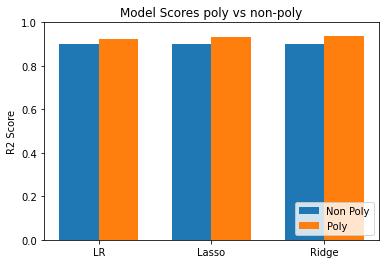

In [276]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
non_poly_scores = (0.9001575080853226, 0.9001615932433034, 0.9003857450412793)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, non_poly_scores, width, bottom=0)

poly_scores = (0.9227344766587158, 0.9324047334385098, 0.936098004217036)
p2 = ax.bar(ind + width, poly_scores, width, bottom=0)

ax.set_title('Model Scores poly vs non-poly')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('LR', 'Lasso', 'Ridge'))

ax.legend((p1[0], p2[0]), ('Non Poly', 'Poly'), loc='lower right')
ax.set_ylim([0,1])
ax.set_ylabel('R2 Score')

plt.show()

In [278]:
lasso_gridsearch_df = pd.DataFrame(lasso_gridsearch.cv_results_)
lasso_gridsearch_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.033836      0.001096         0.000488        0.000054       0.001   
1       0.039415      0.009709         0.002034        0.003156      0.0035   
2       0.036113      0.005201         0.000733        0.000421       0.006   
3       0.037518      0.009979         0.001533        0.002181      0.0085   
4       0.038086      0.009600         0.000630        0.000352       0.011   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}           0.938759           0.902270            0.90578   
1  {'alpha': 0.0035}           0.938759           0.902271            0.90578   
2   {'alpha': 0.006}           0.938759           0.902271            0.90578   
3  {'alpha': 0.0085}           0.938759           0.902272            0.90578   
4   {'alpha': 0.011}           0.938759           0.902272            0.90578   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.890360           0.924347         0.912303        0.017145   
1           0.890361           0.924347         0.912303        0.017144   
2           0.890362           0.924347         0.912304        0.017144   
3           0.890362           0.924347         0.912304        0.017144   
4           0.890363           0.924347         0.912304        0.017144   

   rank_test_score  
0              200  
1              199  
2              198  
3              197  
4              196

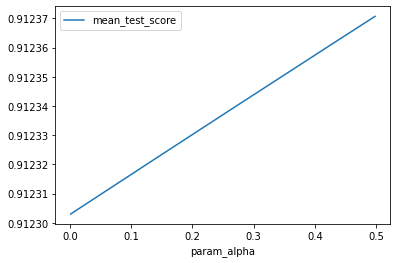

In [279]:
lasso_gridsearch_df.plot(x='param_alpha',y='mean_test_score')

## Inferences

_The three models have very similar performances with all their respective scores being in the lower 90% range for the test set._
<br>
_The models also had a sightly higher test set score than the train set score indicating that there was no overfitting. The difference is scores was under 5 points and not significant enough to indicate underfitting. Any of the models could be used for predicting the price. _
<br>
<br>
The highest score was for Ridge regression @0.90038 without polynomial features_
<br>
_With polynomial features, Ridge regression still has the highest score @0.9360980042170366_
<br>
_I will be using Ridge for the final submission_
<br>
_Submitted the non polynomial and the polynomial to Kaggle._
<br>
<br>
_Non poly - All models seem to be prioritizing the feature Overall Qual, Gr Liv Area, BasmtFin SF1, and 1st Flr SF the most. The Overall quality of the home seems to be the best indicator.To get even better perfomance, one might consider creating polynomial features by combining this with some other features if time permits._
<br>
<br>
_Poly - All models seem to be prioritizing the feature New_Bsmt_Feat New_Ovr_Kit_Feat the most. This is a polynomial feature which in turn was created by a combination of features of other features. This makes sense as this features cover the polynomial combination of: Total Bsmt SF, Bsmt Qual, Bsmt Cond, Overall Qual, Overall Cond, Kitchen Qual, and Gr Liv Area The subsequent features seem to differ in priority based on model._

# Test Data 

## Import and Predictions

In [191]:
test = pd.read_csv('./datasets/clean_test_encoded_poly.csv')

In [192]:
X_final = test[interested_feat]

In [193]:
X_final.head()

Lot Area  Lot Shape  Overall Qual  Year Built  Year Remod/Add  \
0      9142          3             6        1910            1950   
1      9662          2             5        1977            1977   
2     17104          2             7        2006            2006   
3      8520          3             5        1923            2006   
4      9500          2             6        1963            1963   

   Mas Vnr Area  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
0           0.0          2          3              0               1   
1           0.0          4          3              0               1   
2           0.0          4          4              2               6   
3           0.0          3          3              0               1   
4         247.0          4          3              0               4   

   BsmtFin SF 1  Total Bsmt SF  Heating QC  Electrical  2nd Flr SF  \
0           0.0         1020.0           4           1        1020   
1           0.0         1967.0           3           4           0   
2         554.0          654.0           5           4         832   
3           0.0          968.0           3           4           0   
4         609.0         1394.0           4           4           0   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Kitchen Qual  \
0         1928             0.0          2          0             2   
1         1967             0.0          2          0             3   
2         1496             1.0          2          1             4   
3          968             0.0          1          0             3   
4         1394             1.0          1          1             3   

   TotRms AbvGrd  Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Finish  \
0              9           0             0         1910.0              1   
1             10           0             0         1977.0              3   
2              7           1             4         2006.0              2   
3              5           0             0         1935.0              1   
4              6           2             4         1963.0              2   

   Garage Cars  Garage Area  Garage Qual  Paved Drive  Wood Deck SF  \
0          1.0        440.0            1            2             0   
1          2.0        580.0            3            2           170   
2          2.0        426.0            3            2           100   
3          2.0        480.0            2            0             0   
4          2.0        514.0            3            2             0   

   Open Porch SF  zoning_RL  zoning_RM  land_countour_HLS  neigh_NAmes  \
0             60          0          1                  0            0   
1              0          1          0                  0            0   
2             24          1          0                  0            0   
3              0          0          1                  0            0   
4             76          1          0                  0            1   

   neigh_NoRidge  neigh_NridgHt  neigh_OldTown  neigh_StoneBr  \
0              0              0              1              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              1              0   
4              0              0              0              0   

   hse_style_2Story  rf_style_Gable  ext1st_VinylSd  mas_vnr_type_BrkFace  \
0                 1               1               0                     0   
1                 0               1               0                     0   
2                 1               1               1                     0   
3                 0               1               0                     0   
4                 0               1               0                     1   

   mas_vnr_type_None  mas_vnr_type_Stone  found_CBlock  found_PConc  \
0                  1                   0             0           

In [194]:
X_final.shape

(879, 73)

In [195]:
X_train.shape

(1448, 73)

### Scaling according to the X_train that the model was trained on

In [196]:
# ss = StandardScaler()
# ss.fit(X_train) 
# X_train_ss = ss.transform(X_train) #This was already done when doing train/test split. 
# The object ss should be saved. 
X_final_scaled = ss.transform(X_final)

### Predicting according to best Ridge model

_Checking if Ridge alpha is still the same as the one with best performance_

In [229]:
best_ridge

Ridge(alpha=14.314589375234792, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [199]:
final_predict = best_ridge.predict(X_final_scaled)

In [200]:
final_df = pd.DataFrame(test['Id'])
final_df['SalePrice'] = final_predict 

In [201]:
final_df.to_csv('./datasets/submission_2.csv', index=False)